# Best CNN Model With Contamination (Not Cross Validated)

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# Get the project root directory
# Try to find project root by looking for "Scanpaths" folder
import os

current_dir = os.getcwd()
project_root = current_dir

# Navigate up to find project root (where "Scanpaths" exists)
for _ in range(3):  # Check up to 3 levels up
    if os.path.exists(os.path.join(current_dir, "Scanpaths")):
        project_root = current_dir
        break
    parent = os.path.dirname(current_dir)
    if parent == current_dir:  # Reached filesystem root
        break
    current_dir = parent

# Dataset path: Scanpaths/contaminated (at project root)
dataset_path = os.path.join(project_root, "Scanpaths", "contaminated")

# Print path for verification
print(f"Project root: {project_root}")
print(f"Dataset path: {dataset_path}")

img_height = 288
img_width = 512
batch_size = 32

In [4]:
# Load datasets
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),  # Original size
    batch_size=batch_size,
    label_mode='binary'
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

Found 1499 files belonging to 2 classes.
Using 1200 files for training.
Found 1499 files belonging to 2 classes.
Using 299 files for validation.


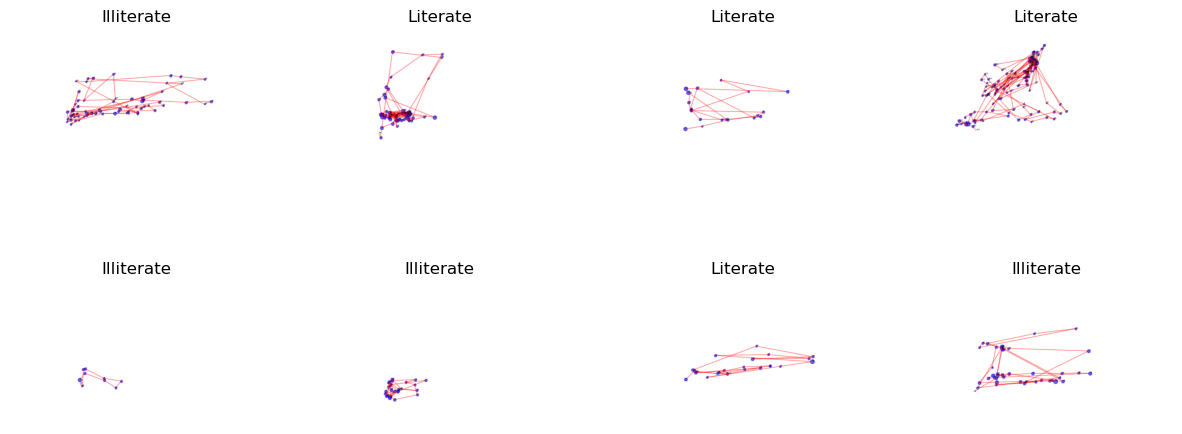

In [5]:
# Visulize data
for images, labels in train_ds.take(1):
    plt.figure(figsize=(15, 6))
    for i in range(8):  # Show 8 sample images
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = int(labels[i].numpy().item())
        plt.title("Literate" if label == 1 else "Illiterate")
        plt.axis("off")
    break

In [6]:
model = models.Sequential([
    layers.Input(shape=(288, 512, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 143, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 126, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 124, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 62, 128)      0

In [111]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [112]:
# Create early stopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

In [113]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 846ms/step - accuracy: 0.5468 - loss: 570.6459 - val_accuracy: 0.6120 - val_loss: 0.6470
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 839ms/step - accuracy: 0.6183 - loss: 0.6553 - val_accuracy: 0.6856 - val_loss: 0.6109
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 818ms/step - accuracy: 0.7016 - loss: 0.5638 - val_accuracy: 0.6421 - val_loss: 0.6234
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 826ms/step - accuracy: 0.7050 - loss: 0.5710 - val_accuracy: 0.7391 - val_loss: 0.5506
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 823ms/step - accuracy: 0.7816 - loss: 0.4607 - val_accuracy: 0.7559 - val_loss: 0.5362
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 813ms/step - accuracy: 0.8486 - loss: 0.3459 - val_accuracy: 0.7659 - val_loss: 0.4734
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 814ms/step - accuracy: 0.9046 - loss: 0.2596 - val_accuracy: 0.8060 - val_loss: 0.4851
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 819ms/step - accuracy: 0.9219 - loss: 0.1909 - val_ac

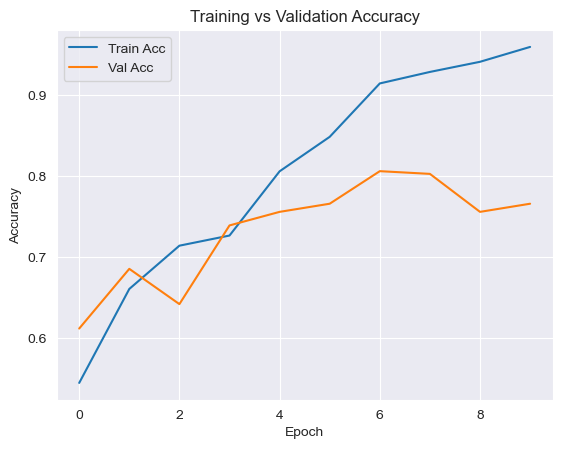

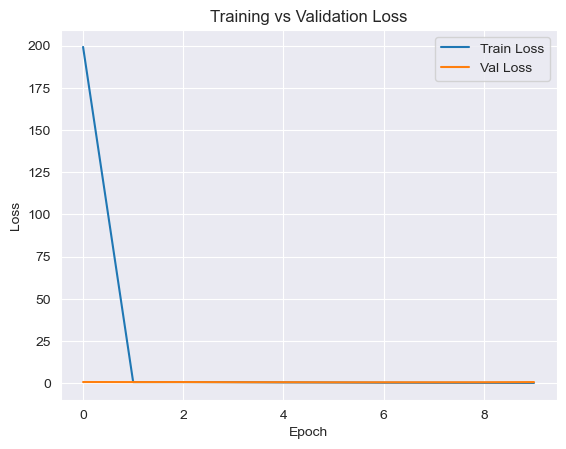

In [114]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [125]:
print(history.history['loss'])
print(history.history['val_loss'])

[199.21595764160156, 0.6181071400642395, 0.604720950126648, 0.5484970211982727, 0.41604799032211304, 0.35047677159309387, 0.23472696542739868, 0.18920081853866577, 0.15390168130397797, 0.11548031121492386]
[0.6470245122909546, 0.6109423041343689, 0.6234412789344788, 0.5506097078323364, 0.5361835956573486, 0.4733990430831909, 0.48511314392089844, 0.49251458048820496, 0.5103850364685059, 0.6041528582572937]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Prediction: 0.7125 → Literate
True Label: Illiterate


C:\Users\tonyg\AppData\Local\Temp\ipykernel_15432\2247833376.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {pred:.2f}, True: {int(labels[i].numpy())}")


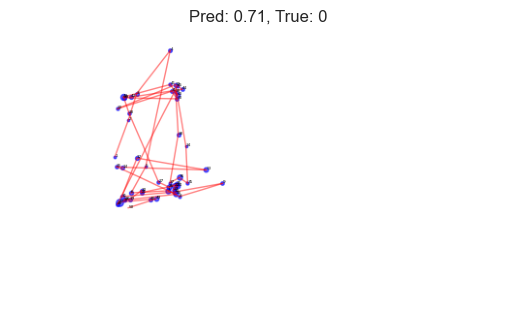

Prediction: 0.0000 → Illiterate
True Label: Illiterate


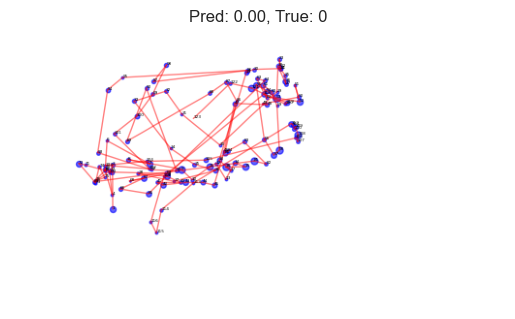

Prediction: 0.1760 → Illiterate
True Label: Literate


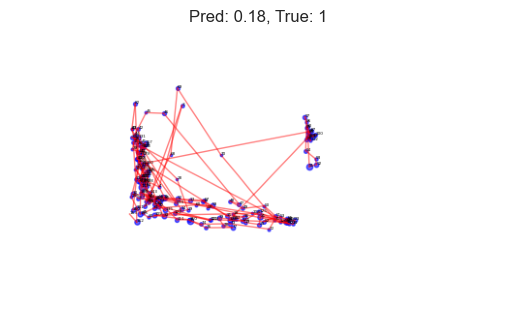

Prediction: 0.9289 → Literate
True Label: Literate


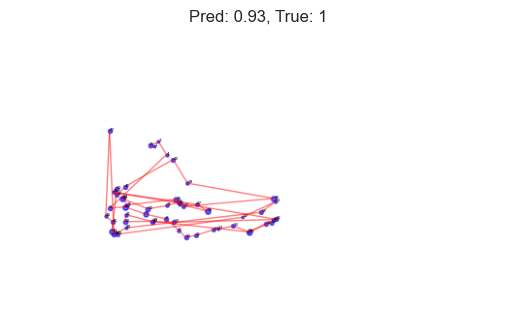

Prediction: 0.9989 → Literate
True Label: Literate


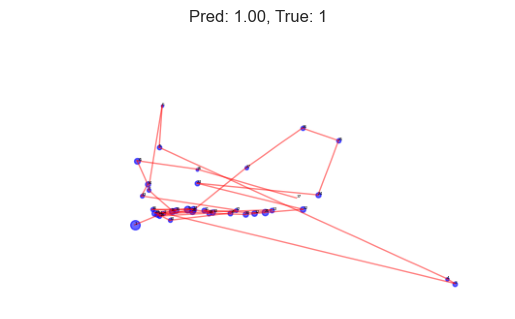

In [115]:
# Visual + prediction check
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        pred = preds[i][0]
        print(f"Prediction: {pred:.4f} → {'Literate' if pred > 0.5 else 'Illiterate'}")
        print(f"True Label: {'Literate' if labels[i] == 1 else 'Illiterate'}")
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(f"Pred: {pred:.2f}, True: {int(labels[i].numpy())}")
        plt.show()

In [118]:
# Collect all true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy().astype(int))
    y_pred.extend((preds > 0.5).astype(int).flatten())  # round to 0 or 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [119]:
# Classification report
print(classification_report(y_true, y_pred, target_names=["Illiterate", "Literate"]))

              precision    recall  f1-score   support

  Illiterate       0.84      0.78      0.81       157
    Literate       0.77      0.84      0.80       142

    accuracy                           0.81       299
   macro avg       0.81      0.81      0.81       299
weighted avg       0.81      0.81      0.81       299



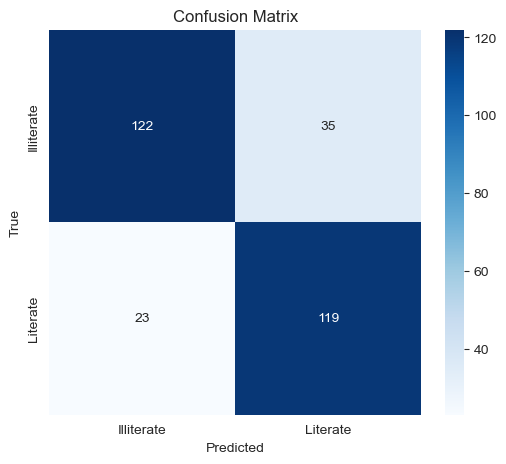

In [123]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Illiterate", "Literate"], yticklabels=["Illiterate", "Literate"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()